# GLOBAL POWER PLANT ANALYSIS

![Power Plants](powerlines_snapshot.jpg)

***
Notebook Authors:

  [David Ambani](https://github.com/bulemi2)<br>
  [Cynthia Kareko](https://github.com/karekocyn)<br>
  [Joy Wangui](https://github.com/carfew001)<br>
  [Emmanuel Rono](https://github.com/marttech26)<br>

***

## 1. PROJECT OVERVIEW

### (a) Introduction

Exploring the landscape of global power plants, this project assumes a pivotal role in unraveling intricate patterns, discerning trends, and extracting valuable insights. The primary objective is to furnish a holistic comprehension of power plant ownership, fuel types, capacity, generation levels, and the growing significance of renewable energy sources. Employing meticulous analysis and predictive modeling techniques, our aim is to illuminate the historical, current, and future dynamics of global power plants. By doing so, we aspire to offer invaluable insights to stakeholders, shaping the narrative of sustainable energy and contributing to the collective understanding of the global power infrastructure.

 ### (b) Business Understanding

In an era dominated by energy transitions and sustainability concerns, the Global Plant Analysis project aims to unravel the complexities of the worldwide power plant landscape. By investigating ownership patterns, fuel types, and renewable energy contributions, the project seeks to provide a clear snapshot of the global power ecosystem. The insights derived will empower stakeholders, policymakers, and investors with a deeper understanding of the dynamics shaping the energy industry, fostering informed decision-making in an increasingly dynamic and critical sector.

This Global Power Plant Analysis is set to benefit the following stakeholders;

- Power generation companies-Strategic planning
- Environmental Agencies-Providing environmental impact assessment
- Researchers and Academia-Contributing to advancements in energy studies
- Local communities-Informed community engagement
- Technology providers-Market identification and growth opportunities
- Government and Regulatory Bodies-Informed decision making
- Investors and financial institutions-Risk mitigation and informed investments


### (c) Problem Statement

The lack of a comprehensive analysis of the Global Power Plant Database hampers stakeholders' ability to make informed decisions in the evolving energy landscape. There is a need for a systematic exploration of power plant ownership, fuel types, capacity trends, and renewable energy contributions globally. This project addresses the absence of actionable insights, hindering effective decision-making for governments, investors, and energy companies, and aims to provide a clear understanding of the global energy scenario through data-driven analysis.

Our strategic approach involves delving into the complexities of data preprocessing, thoughtful model selection, and the establishment of robust evaluation metrics. This comprehensive methodology seeks to provide a detailed exploration of the global energy scenario, enabling stakeholders to make well-informed decisions in a rapidly transforming sector. The ultimate goal is to fill the void in actionable insights, fostering informed decision-making and facilitating a deeper understanding of the intricate dynamics shaping the global power infrastructure.

### (d) Research Questions

- What are the prevailing patterns and trends in global power plant ownership, and how do these patterns vary across different regions and continents? <br>

- How has the distribution of fuel types evolved over time in the global power plant landscape, and what factors contribute to the shifts in reliance on different energy sources?<br>

- What is the correlation between power plant capacity and the geographical characteristics of different regions globally? How do these correlations influence energy production and consumption patterns?<br>

- To what extent has the adoption of renewable energy sources impacted the overall energy mix, and what are the key challenges and opportunities associated with integrating renewable technologies into the global power infrastructure?<br>

### (e) The Main Objective

- To develop a predictive model leveraging the analysis of the Global Power Plant Database to accurately forecast the power generation of power plants.

### (f) The Specific Objectives


Specific Objectives

- Investigate the geographic distribution of power plants globally to identify regional disparities and potential gaps in energy infrastructure.
- Analyze the ownership patterns of power plants to understand the landscape of key stakeholders and identify areas with opportunities for investment or collaboration.
- Examine the capacity distribution of power plants to identify trends and variations in energy production capabilities across different regions.
- Explore the correlation between fuel types and power plant efficiency to identify areas where transitioning to more sustainable energy sources can be optimized.
- Investigate the distribution of renewable energy contributions across various power plants to assess the global impact of sustainable practices in the energy sector.

### (g) Data Understanding

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type.

The dataset contains the following columns with their descriptions:

- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [4]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `fuel (text): energy source used in electricity generation or export
- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_ (number): electricity generation in gigawatt-hours reported
- `estimated_generation_gwh` (number): estimated annual electricity generation in gigawatt-hours

The database is available for immediate download and use through the http://datasets.wri.org/dataset/globalpowerplantdatabase

**Importing libraries**

In [1]:
# Data manipulation and analysis
import pandas as pd  

# Creating visualizations
import matplotlib.pyplot as plt  

# Statistical data visualization
import seaborn as sns  

# Numerical operations
import numpy as np  

# Working with geospatial data
import geopandas as gpd  

# Handling date and time information
import datetime as dt  

# Mathematical functions
import math  

# Importing from functions.py
from functions import plot_top_n, plot_top_and_bottom_countries_by_capacity, plot_capacity_generation_scatter, plot_power_plant_distribution

## 2. Data Cleaning

In [2]:
# Read CSV file into data frame
df = pd.read_csv('global_power_plant_database.csv')

<ipython-input-2-27a6c9799906>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('global_power_plant_database.csv')


In [3]:
#Check the first few rows of the DataFrame
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [4]:
# Display the shape of the DataFrame
df.shape

(34936, 36)

This indicates that the DataFrame comprises 34,936 rows and 36 columns. Each row corresponds to an individual power plant, and the columns represent the characteristics or attributes associated with these interactions.

In [5]:
#Get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

In [6]:
# Display descriptive statistics of the DataFrame
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
count,34936.000000,34936.000000,34936.000000,17447.000000,14887.000000,6417.000000,7226.000000,8203.000000,9144.000000,9500.000000,9637.000000,9659.000000,16120.000000,16503.000000,17050.000000,17570.000000,33138.000000
mean,163.355148,32.816637,-6.972803,1997.414823,2018.218849,592.696107,656.863891,762.368840,693.149763,661.834161,517.320785,423.922436,239.112221,242.431122,235.866067,235.695265,716.443378
std,489.636072,22.638603,78.405850,23.397835,1.606428,2174.833482,2231.464288,2533.459828,2404.516759,2369.296957,1975.302686,1698.506485,1191.258172,1285.798297,1267.005223,1259.559841,2484.361200
min,1.000000,-77.847000,-179.977700,1896.000000,2000.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,-780.339000,1.120000,0.870000,0.440000,0.300000,0.000000
25%,4.900000,29.256475,-77.641550,1988.000000,2017.000000,1.947000,2.260000,2.664500,2.729000,2.467000,2.242000,2.751500,8.620000,8.680000,8.380000,8.322500,8.180000
50%,16.745000,39.727750,-2.127100,2007.000000,2019.000000,23.426000,23.608500,26.142000,22.462389,17.876500,12.530000,11.530000,27.620000,28.250000,26.830000,27.555000,37.590000
75%,75.344250,46.263125,49.502675,2014.000000,2019.000000,199.706000,226.322250,285.862583,249.866750,214.505150,151.117000,122.781498,106.805000,106.980000,103.120000,107.237500,229.565000
max,22500.000000,71.292000,179.388700,2020.000000,2019.000000,50834.000000,32320.917000,37433.607000,32377.477000,36448.643000,35136.000000,31920.368000,48675.060000,58470.770000,57113.350000,60859.730000,82810.770000


In [7]:
# Describe all columns including non-numeric
df.describe(include='all')

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
count,34936,34936,34936,34936,34936.000000,34936.000000,34936.000000,34936,1944,276,...,16120.000000,16503.000000,17050.000000,17570.000000,33138.000000,34936,34936,34936,34936,34936
unique,167,167,34528,34936,NaN,NaN,NaN,15,12,11,...,NaN,NaN,NaN,NaN,NaN,5,5,5,5,6
top,USA,United States of America,Santo Antônio,GEODB0040538,NaN,NaN,NaN,Solar,Oil,Gas,...,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
freq,9833,9833,6,1,NaN,NaN,NaN,10665,1169,100,...,NaN,NaN,NaN,NaN,NaN,18816,18433,17886,17366,14942
mean,NaN,NaN,NaN,NaN,163.355148,32.816637,-6.972803,NaN,NaN,NaN,...,239.112221,242.431122,235.866067,235.695265,716.443378,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,489.636072,22.638603,78.405850,NaN,NaN,NaN,...,1191.258172,1285.798297,1267.005223,1259.559841,2484.361200,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,-77.847000,-179.977700,NaN,NaN,NaN,...,1.120000,0.870000,0.440000,0.300000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,29.256475,-77.641550,NaN,NaN,NaN,...,8.620000,8.680000,8.380000,8.322500,8.180000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,16.745000,39.727750,-2.127100,NaN,NaN,NaN,...,27.620000,28.250000,26.830000,27.555000,37.590000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,75.344250,46.263125,49.502675,NaN,NaN,NaN,...,106.805000,106.980000,103.120000,107.237500,229.565000,NaN,NaN,NaN,NaN,NaN


In [8]:
#Check the unique values in each column
df.nunique()

country                             167
country_long                        167
name                              34528
gppd_idnr                         34936
capacity_mw                        5611
latitude                          31779
longitude                         33036
primary_fuel                         15
other_fuel1                          12
other_fuel2                          11
other_fuel3                           8
commissioning_year                 2023
owner                             10144
source                              866
url                                4870
geolocation_source                   28
wepp_id                           15263
year_of_capacity_data                11
generation_gwh_2013                5458
generation_gwh_2014                6159
generation_gwh_2015                7037
generation_gwh_2016                7671
generation_gwh_2017                7974
generation_gwh_2018                7946
generation_gwh_2019                8327


In [9]:
# Interpolate Missing Values
df_cleaned = df.interpolate()
df_cleaned

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.3220,65.1190,Hydro,NaN,NaN,...,123.770,162.900,97.390000,137.760,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.6700,65.7950,Solar,NaN,NaN,...,18.430,17.480,18.250000,17.700,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.6230,65.7920,Solar,NaN,NaN,...,18.640,17.580,19.100000,17.620,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.5560,69.4787,Hydro,NaN,NaN,...,225.060,203.550,146.900000,230.180,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.6410,69.7170,Hydro,NaN,NaN,...,406.160,357.220,270.990000,395.380,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34931,ZMB,Zambia,Ndola,WRI1022386,50.0,-12.9667,28.6333,Oil,NaN,NaN,...,392.680,392.680,374.786667,395.450,183.79,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34932,ZMB,Zambia,Nkana,WRI1022384,20.0,-12.8167,28.2000,Oil,NaN,NaN,...,484.230,484.230,461.863333,487.675,73.51,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34933,ZMB,Zambia,Victoria Falls,WRI1022380,108.0,-17.9167,25.8500,Hydro,NaN,NaN,...,575.780,575.780,548.940000,579.900,578.32,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
34934,ZWE,Zimbabwe,Hwange Coal Power Plant Zimbabwe,GEODB0040404,920.0,-18.3835,26.4700,Coal,NaN,NaN,...,2287.765,2287.765,2146.980000,2004.275,2785.10,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


In [10]:
# Check for Missing Values in df_cleaned
df_cleaned.isna().sum()

country                               0
country_long                          0
name                                  0
gppd_idnr                             0
capacity_mw                           0
latitude                              0
longitude                             0
primary_fuel                          0
other_fuel1                       32992
other_fuel2                       34660
other_fuel3                       34844
commissioning_year                    9
owner                             14068
source                               15
url                                  18
geolocation_source                  419
wepp_id                           18702
year_of_capacity_data                 0
generation_gwh_2013                 337
generation_gwh_2014                 337
generation_gwh_2015                 337
generation_gwh_2016                 337
generation_gwh_2017                 337
generation_gwh_2018                 337
generation_gwh_2019               24710


In [11]:
# List of columns to drop
columns_to_drop = ['wepp_id', 'url', 'geolocation_source', 'generation_gwh_2018','other_fuel1', 'other_fuel2',
                   'other_fuel3', 'country', 'generation_data_source', 'generation_gwh_2019', 'estimated_generation_note_2013',
                   'estimated_generation_note_2014', 'estimated_generation_note_2015', 'estimated_generation_note_2016',
                   'estimated_generation_note_2017']

# Drop the specified columns
df_cleaned.drop(columns=columns_to_drop, inplace=True)

# Display the updated DataFrame
df_cleaned.head()

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,...,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,GEODB,...,NaN,NaN,NaN,NaN,NaN,123.77,162.90,97.39,137.76,119.50
1,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,Wiki-Solar,...,NaN,NaN,NaN,NaN,NaN,18.43,17.48,18.25,17.70,18.29
2,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,Wiki-Solar,...,NaN,NaN,NaN,NaN,NaN,18.64,17.58,19.10,17.62,18.72
3,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,GEODB,...,NaN,NaN,NaN,NaN,NaN,225.06,203.55,146.90,230.18,174.91
4,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,GEODB,...,NaN,NaN,NaN,NaN,NaN,406.16,357.22,270.99,395.38,350.80


In [12]:
# Fill Specific Missing Values in df_cleaned
df_cleaned = df_cleaned.fillna({'owner': 'unknown',
                                'geolocation_source' : 'google',
                                'commissioning_year': 1975,
                                'source' : 'google',
                                'url' : 'https://www.wiki-solar.org',})
df_cleaned.head()

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,...,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,1975.0,unknown,GEODB,...,NaN,NaN,NaN,NaN,NaN,123.77,162.90,97.39,137.76,119.50
1,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,1975.0,unknown,Wiki-Solar,...,NaN,NaN,NaN,NaN,NaN,18.43,17.48,18.25,17.70,18.29
2,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,1975.0,unknown,Wiki-Solar,...,NaN,NaN,NaN,NaN,NaN,18.64,17.58,19.10,17.62,18.72
3,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,1975.0,unknown,GEODB,...,NaN,NaN,NaN,NaN,NaN,225.06,203.55,146.90,230.18,174.91
4,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,1975.0,unknown,GEODB,...,NaN,NaN,NaN,NaN,NaN,406.16,357.22,270.99,395.38,350.80


In [13]:
# Check for Missing Values in df_cleaned
df_cleaned.isna().sum()

country_long                       0
name                               0
gppd_idnr                          0
capacity_mw                        0
latitude                           0
longitude                          0
primary_fuel                       0
commissioning_year                 0
owner                              0
source                             0
year_of_capacity_data              0
generation_gwh_2013              337
generation_gwh_2014              337
generation_gwh_2015              337
generation_gwh_2016              337
generation_gwh_2017              337
estimated_generation_gwh_2013      0
estimated_generation_gwh_2014      0
estimated_generation_gwh_2015      0
estimated_generation_gwh_2016      0
estimated_generation_gwh_2017      0
dtype: int64

In [14]:
# Fill Missing Values in Specific Columns using Backward Fill
columns_to_fill = ['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
                   'generation_gwh_2017']

for column in columns_to_fill:
    df_cleaned[column].fillna(method='bfill', inplace=True)

# # Fill the last column with the 'pad' method
# df_cleaned['generation_gwh_2018'].fillna(method='pad', inplace=True)

In [15]:
# Check for Missing Values in df_cleaned
df_cleaned.isnull().sum()

country_long                     0
name                             0
gppd_idnr                        0
capacity_mw                      0
latitude                         0
longitude                        0
primary_fuel                     0
commissioning_year               0
owner                            0
source                           0
year_of_capacity_data            0
generation_gwh_2013              0
generation_gwh_2014              0
generation_gwh_2015              0
generation_gwh_2016              0
generation_gwh_2017              0
estimated_generation_gwh_2013    0
estimated_generation_gwh_2014    0
estimated_generation_gwh_2015    0
estimated_generation_gwh_2016    0
estimated_generation_gwh_2017    0
dtype: int64

There are no missing values in our dataframe.

In [16]:
# Rename the 'country_long' column to 'country' and 'name' to 'plant name'
df_cleaned.rename(columns={'country_long': 'country', 'name' : 'plant name'}, inplace=True)

In [17]:
#Get a concise summary of df_cleaned
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        34936 non-null  object 
 1   plant name                     34936 non-null  object 
 2   gppd_idnr                      34936 non-null  object 
 3   capacity_mw                    34936 non-null  float64
 4   latitude                       34936 non-null  float64
 5   longitude                      34936 non-null  float64
 6   primary_fuel                   34936 non-null  object 
 7   commissioning_year             34936 non-null  float64
 8   owner                          34936 non-null  object 
 9   source                         34936 non-null  object 
 10  year_of_capacity_data          34936 non-null  float64
 11  generation_gwh_2013            34936 non-null  float64
 12  generation_gwh_2014            34936 non-null 

### Feature Engineering

##### (a) Power Plants Age

In [18]:
# Calculate plant age
current_year = dt.datetime.now().year
df_cleaned['plant_age'] = current_year - df_cleaned['commissioning_year']

# Round up the ages
df_cleaned['plant_age'] = df_cleaned['plant_age'].apply(lambda x: math.ceil(x))
df_cleaned.head()

,country,plant name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,...,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,plant_age
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,1975.0,unknown,GEODB,...,102.642778,96.555556,95.872778,85.900278,123.77,162.90,97.39,137.76,119.50,49
1,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,1975.0,unknown,Wiki-Solar,...,102.642778,96.555556,95.872778,85.900278,18.43,17.48,18.25,17.70,18.29,49
2,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,1975.0,unknown,Wiki-Solar,...,102.642778,96.555556,95.872778,85.900278,18.64,17.58,19.10,17.62,18.72,49
3,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,1975.0,unknown,GEODB,...,102.642778,96.555556,95.872778,85.900278,225.06,203.55,146.90,230.18,174.91,49
4,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,1975.0,unknown,GEODB,...,102.642778,96.555556,95.872778,85.900278,406.16,357.22,270.99,395.38,350.80,49


This is the estimated age of all power plants.

##### (b) Total Energy Generation for all recorded years

In [19]:
#create column called total_generation_2013_2017
df_cleaned['total_generation_2013_2017'] = df_cleaned[['generation_gwh_2013',
                                                       'generation_gwh_2014',
                                                       'generation_gwh_2015',
                                                       'generation_gwh_2016',
                                                       'generation_gwh_2017']].sum(axis=1)
df_cleaned.head()

,country,plant name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,...,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,plant_age,total_generation_2013_2017
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,1975.0,unknown,GEODB,...,96.555556,95.872778,85.900278,123.77,162.90,97.39,137.76,119.50,49,470.566667
1,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,1975.0,unknown,Wiki-Solar,...,96.555556,95.872778,85.900278,18.43,17.48,18.25,17.70,18.29,49,470.566667
2,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,1975.0,unknown,Wiki-Solar,...,96.555556,95.872778,85.900278,18.64,17.58,19.10,17.62,18.72,49,470.566667
3,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,1975.0,unknown,GEODB,...,96.555556,95.872778,85.900278,225.06,203.55,146.90,230.18,174.91,49,470.566667
4,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,1975.0,unknown,GEODB,...,96.555556,95.872778,85.900278,406.16,357.22,270.99,395.38,350.80,49,470.566667


This is the sum of all generation values across the years from 2013 to 2017.

##### (c) Capacity Utilization Factor (CUF)

In [20]:
# create CUF column
df_cleaned['cuf'] = df_cleaned['generation_gwh_2017'] / (df_cleaned['capacity_mw'] * 24 * 365)
df_cleaned.head()

,country,plant name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,...,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,plant_age,total_generation_2013_2017,cuf
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,1975.0,unknown,GEODB,...,95.872778,85.900278,123.77,162.90,97.39,137.76,119.50,49,470.566667,0.000297
1,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,1975.0,unknown,Wiki-Solar,...,95.872778,85.900278,18.43,17.48,18.25,17.70,18.29,49,470.566667,0.000981
2,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,1975.0,unknown,Wiki-Solar,...,95.872778,85.900278,18.64,17.58,19.10,17.62,18.72,49,470.566667,0.000981
3,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,1975.0,unknown,GEODB,...,95.872778,85.900278,225.06,203.55,146.90,230.18,174.91,49,470.566667,0.000149
4,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,1975.0,unknown,GEODB,...,95.872778,85.900278,406.16,357.22,270.99,395.38,350.80,49,470.566667,0.000098


This is the ratio of actual generation to the maximum possible generation. This is specifically for 2017.

##### (d) Fuel Type Encoding

In [21]:
# One-Hot Encoding (OHE) for the 'primary_fuel' column
df_cleaned = pd.get_dummies(df_cleaned, columns=['primary_fuel'], dtype=int)
df_cleaned

,country,plant name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,year_of_capacity_data,...,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Other,primary_fuel_Petcoke,primary_fuel_Solar,primary_fuel_Storage,primary_fuel_Waste,primary_fuel_Wave and Tidal,primary_fuel_Wind
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.3220,65.1190,1975.0,unknown,GEODB,2017.0,...,1,0,0,0,0,0,0,0,0,0
1,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.6700,65.7950,1975.0,unknown,Wiki-Solar,2017.0,...,0,0,0,0,0,1,0,0,0,0
2,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.6230,65.7920,1975.0,unknown,Wiki-Solar,2017.0,...,0,0,0,0,0,1,0,0,0,0
3,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.5560,69.4787,1975.0,unknown,GEODB,2017.0,...,1,0,0,0,0,0,0,0,0,0
4,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.6410,69.7170,1975.0,unknown,GEODB,2017.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34931,Zambia,Ndola,WRI1022386,50.0,-12.9667,28.6333,2016.0,ZESCO,Energy Regulation Board of Zambia,2017.0,...,0,0,1,0,0,0,0,0,0,0
34932,Zambia,Nkana,WRI1022384,20.0,-12.8167,28.2000,2016.0,ZESCO,Energy Regulation Board of Zambia,2017.0,...,0,0,1,0,0,0,0,0,0,0
34933,Zambia,Victoria Falls,WRI1022380,108.0,-17.9167,25.8500,2016.0,ZESCO,Energy Regulation Board of Zambia,2017.0,...,1,0,0,0,0,0,0,0,0,0
34934,Zimbabwe,Hwange Coal Power Plant Zimbabwe,GEODB0040404,920.0,-18.3835,26.4700,2016.0,unknown,GEODB,2017.0,...,0,0,0,0,0,0,0,0,0,0


The resulting dataframe, df_cleaned, now includes binary columns for each category in 'primary_fuel'.

In [22]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        34936 non-null  object 
 1   plant name                     34936 non-null  object 
 2   gppd_idnr                      34936 non-null  object 
 3   capacity_mw                    34936 non-null  float64
 4   latitude                       34936 non-null  float64
 5   longitude                      34936 non-null  float64
 6   commissioning_year             34936 non-null  float64
 7   owner                          34936 non-null  object 
 8   source                         34936 non-null  object 
 9   year_of_capacity_data          34936 non-null  float64
 10  generation_gwh_2013            34936 non-null  float64
 11  generation_gwh_2014            34936 non-null  float64
 12  generation_gwh_2015            34936 non-null 

##### (e) Location Clustering

In [23]:
df_cleaned['country'].nunique()

167

## 3. Exploratory Data Analysis (EDA)

With our data now cleaned and prepared, our next step involves visualizing it. The primary focus is on creating graphs and visuals to enhance our visual understanding of the data's insights. Seaborn and Matplotlib will be employed as the main tools for this visualization process.

In [24]:
df_cleaned

,country,plant name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,year_of_capacity_data,...,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Other,primary_fuel_Petcoke,primary_fuel_Solar,primary_fuel_Storage,primary_fuel_Waste,primary_fuel_Wave and Tidal,primary_fuel_Wind
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.3220,65.1190,1975.0,unknown,GEODB,2017.0,...,1,0,0,0,0,0,0,0,0,0
1,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.6700,65.7950,1975.0,unknown,Wiki-Solar,2017.0,...,0,0,0,0,0,1,0,0,0,0
2,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.6230,65.7920,1975.0,unknown,Wiki-Solar,2017.0,...,0,0,0,0,0,1,0,0,0,0
3,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.5560,69.4787,1975.0,unknown,GEODB,2017.0,...,1,0,0,0,0,0,0,0,0,0
4,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.6410,69.7170,1975.0,unknown,GEODB,2017.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34931,Zambia,Ndola,WRI1022386,50.0,-12.9667,28.6333,2016.0,ZESCO,Energy Regulation Board of Zambia,2017.0,...,0,0,1,0,0,0,0,0,0,0
34932,Zambia,Nkana,WRI1022384,20.0,-12.8167,28.2000,2016.0,ZESCO,Energy Regulation Board of Zambia,2017.0,...,0,0,1,0,0,0,0,0,0,0
34933,Zambia,Victoria Falls,WRI1022380,108.0,-17.9167,25.8500,2016.0,ZESCO,Energy Regulation Board of Zambia,2017.0,...,1,0,0,0,0,0,0,0,0,0
34934,Zimbabwe,Hwange Coal Power Plant Zimbabwe,GEODB0040404,920.0,-18.3835,26.4700,2016.0,unknown,GEODB,2017.0,...,0,0,0,0,0,0,0,0,0,0


### (a) Univariate Data Analysis

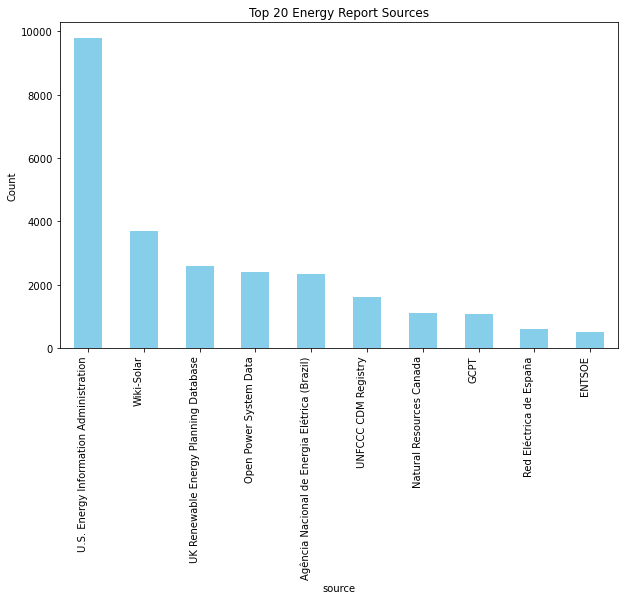

In [25]:
plot_top_n(df_cleaned, 'source', title= 'Top 20 Energy Report Sources')

The primary provider of reports is the US Energy Information Administration. Notably, major energy sources are attributed to European and American nations. However, there is a call for African countries to enhance their capabilities in data collection and analysis.

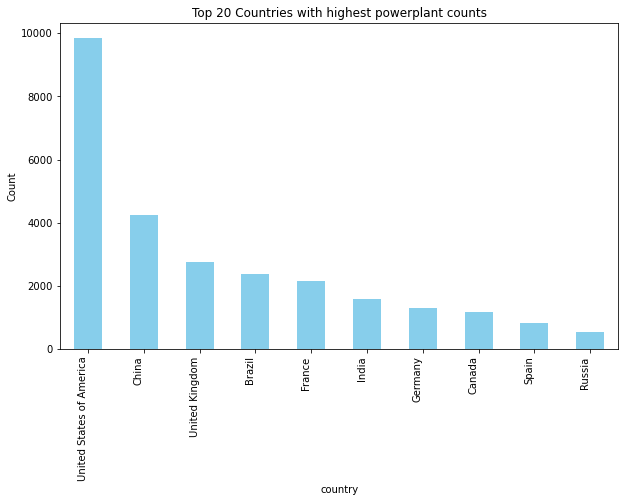

In [26]:
plot_top_n(df_cleaned, 'country', title='Top 20 Countries with highest powerplant counts')

The United States exhibits the highest count, followed by China, the United Kingdom, Brazil, France, India, and Germany—essentially encompassing all developed nations.

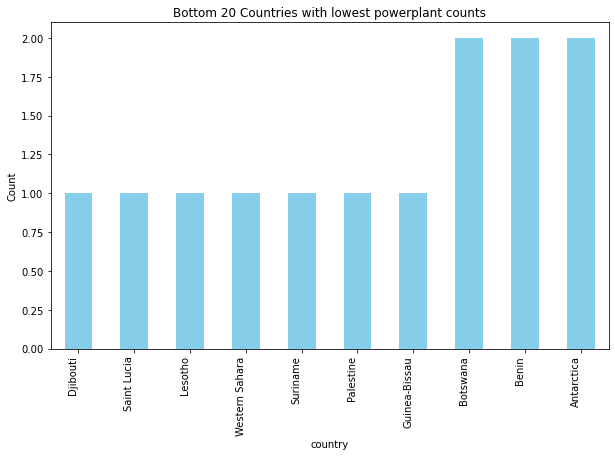

In [27]:
plot_top_n(df_cleaned, 'country', smallest= True, title='Bottom 20 Countries with lowest powerplant counts')

Nearly every nation with the lowest number of power plants per country is located in Africa. Djibouti, Saint Lucia, Lesotho, Guinea-Bissau, Palestine, and Suriname each possess only one power plant within their entire territory.

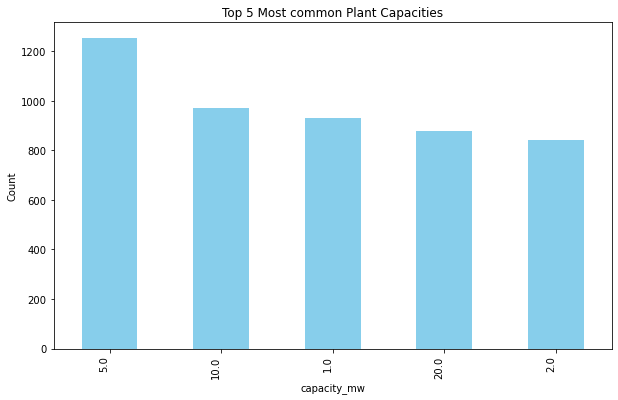

In [28]:
plot_top_n(df_cleaned, 'capacity_mw', n=5, title= 'Top 5 Most common Plant Capacities')

The majority of power plants possess a capacity of 5 megawatts, with their total count exceeding 1200 facilities.

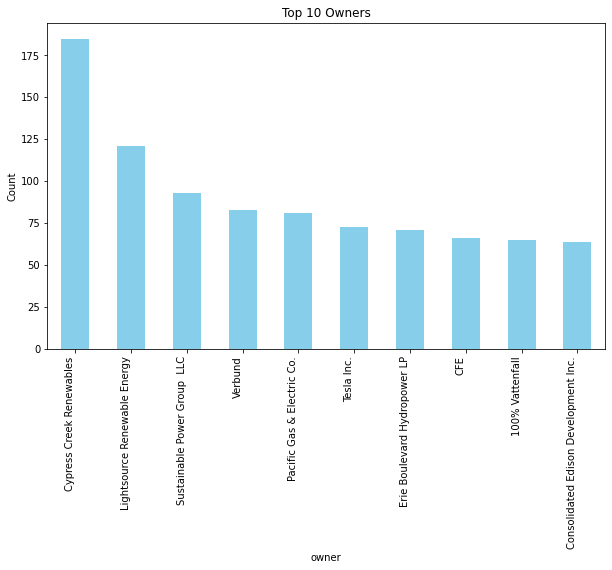

In [29]:
plot_top_n(df_cleaned, 'owner', n=10, skip_first=True, title='Top 10 Owners')

Cypress Creek Renewables holds the highest number of power plants, making it the largest owner, followed by Lightsource Energy and Sustainable Power Group.

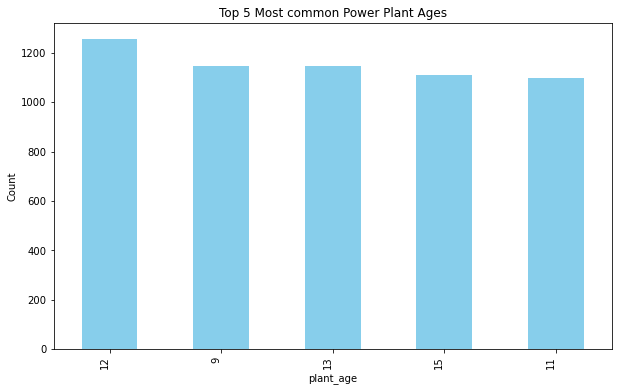

In [30]:
plot_top_n(df_cleaned, 'plant_age', n=5, title= 'Top 5 Most common Power Plant Ages')

The majority of power plants, exceeding 1200 in number, have been in operation for approximately 12 years. This indicates that a significant portion of power plants were constructed in the 21st century, aligning with technological and industrial advancements during that period.

### (b) Bivariate Data Analysis

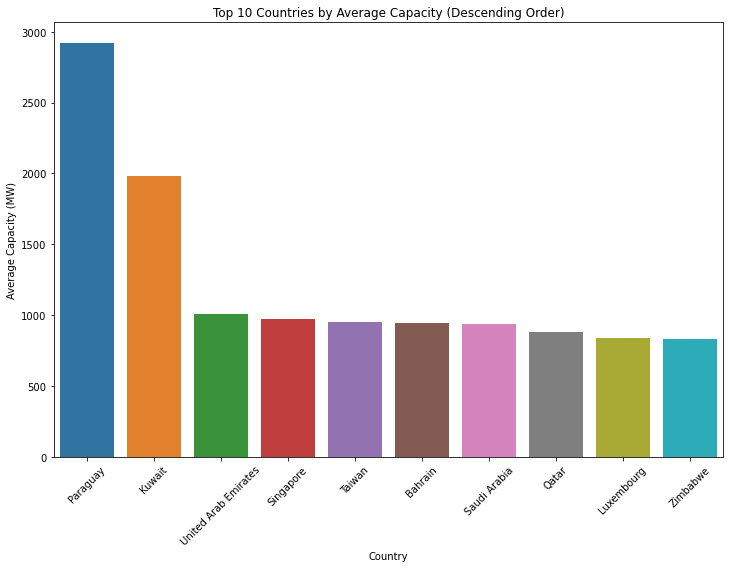

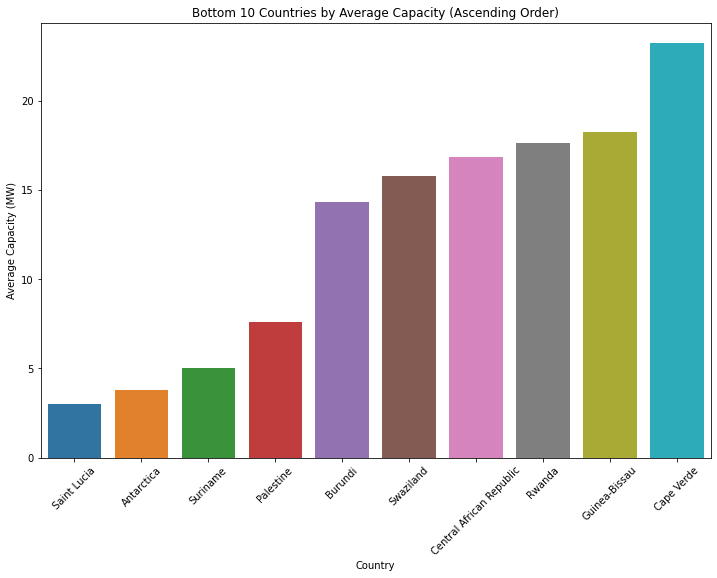

In [31]:
plot_top_and_bottom_countries_by_capacity(df_cleaned, n=10)

Paraguay boasts the highest average capacity, with Kuwait and the UAE following closely behind.

On the other end of the spectrum, Saint Lucia holds the lowest average capacity, contributing to the nation experiencing some of the highest electricity prices worldwide. This is due to the limited electricity generation capacity in Saint Lucia, which results in a higher demand for energy imports and, consequently, elevated electricity costs for consumers in the country.

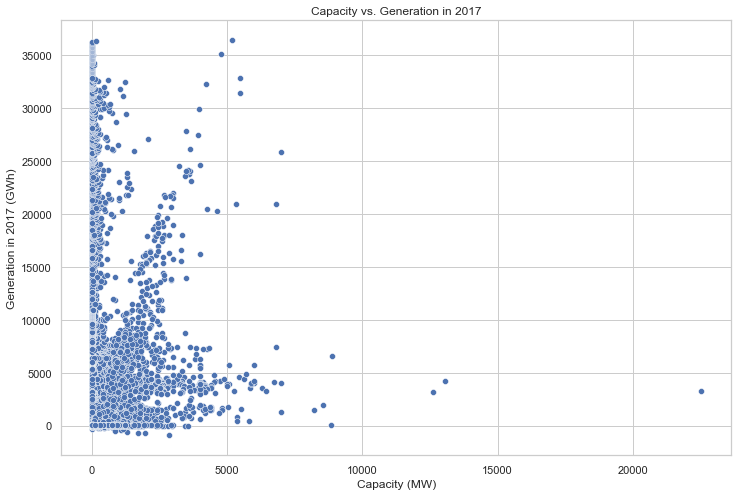

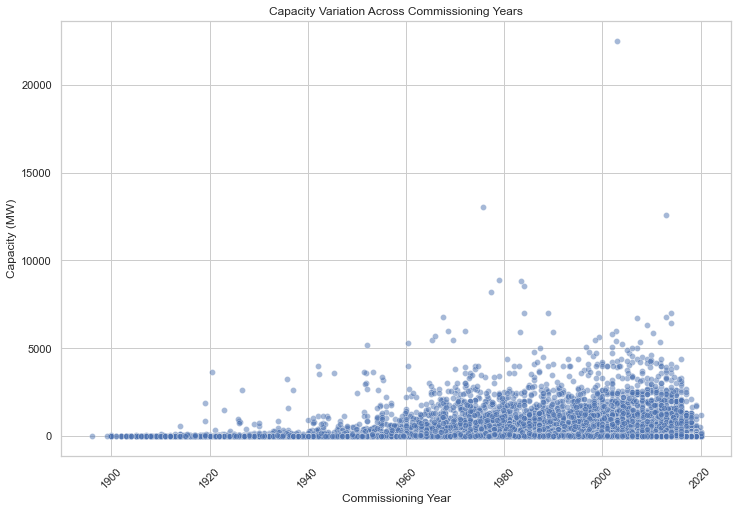

In [32]:
plot_capacity_generation_scatter(df_cleaned)

The first graph, titled 'Capacity vs. Generation in 2017,' illustrates that the energy generation in the year 2017, was clustured around 10,000 GWh and a capacity of about 5000 MW.

The second plot, named 'Capacity Trends Over Commissioning Years,' demonstrates a notable trend over time, showing an upward trajectory in plant capacities. Starting from nearly zero in the early 1900s, capacities steadily rise, reaching approximately 5000 MW by the year 2020 as we transition into the new century.

C:\Users\Rono\Documents\GLOBALPOWER-ANALYSIS\functions.py:87: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


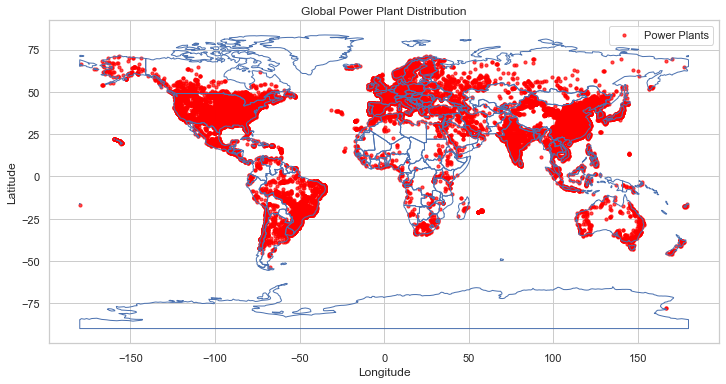

In [33]:
plot_power_plant_distribution(df_cleaned)

The visual representation of power plant locations worldwide is depicted in the distribution map. Each red marker on the map corresponds to the exact position of a power plant. Analyzing the spatial configuration of these markers reveals discernible patterns, concentrations, and disparities in the distribution of power plants. Regions with notable concentrations include North and South America, Europe, and Asia. Conversely, certain areas such as Africa, particularly Central Africa, as well as Northern Asia and Northern Europe, exhibit noticeable gaps in the distribution of power plants.

###### Prepping for modelling

In [34]:
# Save the DataFrame 'df_cleaned' to a CSV file named 'modelling.csv'
df_cleaned.to_csv('modelling.csv', index=False)